# Upper Confidence Bound (UCB)

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing UCB

In [ ]:
import math
N = 10000
d = 10
ads_selected = []
numbers_of_selections =[0] * d
sums_of_rewards = [0] * d
total_reward = 0
for n  in range(0, N):
  ad = 0
  max_upper_bound = 0
  for i in range(0,d):
    if (numbers_of_selections[i]>0):
      average_reward = sums_of_rewards[i] / numbers_of_selections[i]
      delta_i = math.sqrt(1.5 * math.log(n+1)/numbers_of_selections[i])
      upper_bound = average_reward +delta_i
    else:
      upper_bound = 1e400
    if (upper_bound > max_upper_bound ):
      max_upper_bound = upper_bound
      ad = i
  ads_selected.append(ad)
  numbers_of_selections[ad]+=1
  reward = dataset.values[n,ad]
  sums_of_rewards[ad] += reward
  total_reward += reward

## Visualising the results

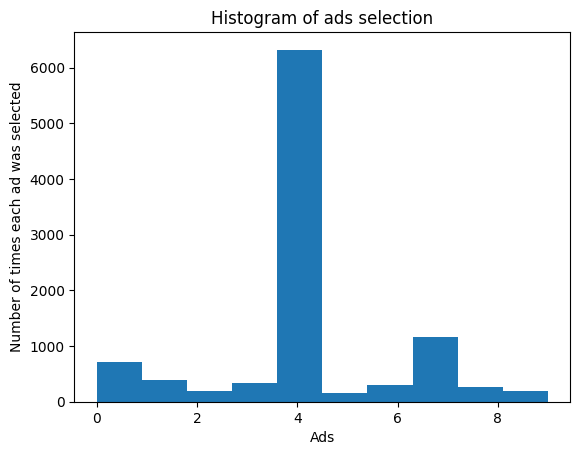

In [ ]:
plt.hist(ads_selected)
plt.title('Histogram of ads selection')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()